<a href="https://colab.research.google.com/github/jacobbriones1/Autoencoder/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<h1>
<center>
Guide to Autoencoders with Python
</center>
</h1>

---

# 1. Autoencoders


## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist, mnist
from tensorflow.keras.models import Model

## Load Fashion MNIST

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Autoencoder in Tensorflow

In [3]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

### Train the Autoencoder
The autoencoder will learn to compress the dataset from 784 dimensions to the latent space, and the decoder will learn to reconstruct the original dataset from the latent space

In [4]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
history=autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0234 - val_loss: 0.0131
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0116 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0100 - val_loss: 0.0100
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.008

In [5]:
# Now that the model is trained, let's test it by encoding and decoding images from the test set.

encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
encoded_imgs.shape

(10000, 64)

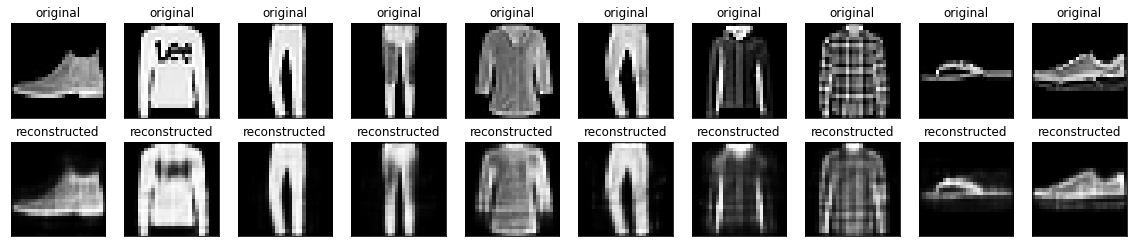

In [6]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

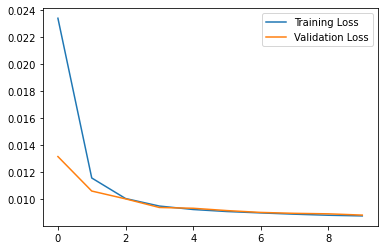

In [7]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [8]:
np.argmax([1.5,2,1.5])

1

## Autoecoder with Scikit-learn

### Define subset of MNIST digits containing $1,5,6$

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
bin = LabelBinarizer()

(x_train, y_train), (x_test, y_test) = mnist.load_data()
y = [y_train[i] in [1,5,6] for i in range(len(list(y_train)))]
yind = [j for j in range(len(y)) if y[j]==True]
X = np.array([x_train[i] for i in yind])
y = [y_train[i] for i in yind]
bin.fit([i for i in range(10)])
y = bin.transform(y)
X = np.array([X[i].flatten() for i in range(X.shape[0])])/255.0

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.08)

### Multilayer Perceptron Regression Architecture

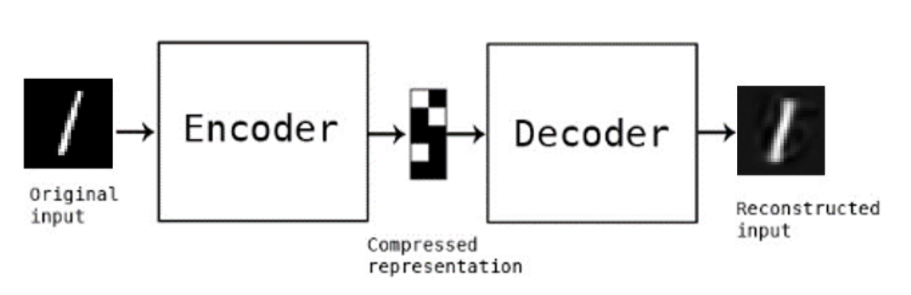

In [12]:
# Shape of input and latent variable
n_input = 28*28

# Encoder structure
n_encoder1 = 500
n_encoder2 = 300
n_latent = 2

# Decoder structure
n_decoder2 = 300  
n_decoder1 = 500

In [13]:
reg = MLPRegressor(hidden_layer_sizes = (n_encoder1, n_encoder2, n_latent, n_decoder2, n_decoder1), 
                   activation = 'tanh',
                   solver = 'adam',
                   learning_rate_init = 0.001,
                   max_iter = 10, 
                   tol = 0.00001, 
                   verbose = True)

### Train Autoencoder

In [14]:
reg.fit(X_train,X_train)

Iteration 1, loss = 0.02673115
Iteration 2, loss = 0.02383931
Iteration 3, loss = 0.02247027
Iteration 4, loss = 0.02218453
Iteration 5, loss = 0.02216509
Iteration 6, loss = 0.02212900
Iteration 7, loss = 0.02210914
Iteration 8, loss = 0.02179360
Iteration 9, loss = 0.02092929
Iteration 10, loss = 0.02043865


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(500, 300, 2, 300, 500),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=10, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='adam', tol=1e-05, validation_fraction=0.1,
             verbose=True, warm_start=False)

#### Fake image

262


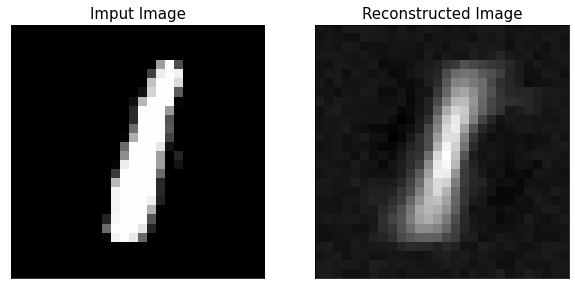

In [15]:
idx = np.random.randint(0,X_test.shape[0])
x_reconst = reg.predict(X_test[idx].reshape(-1,784))
print(idx)
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.imshow(X_test[idx].reshape(28,28), 'gray')
plt.title('Imput Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(x_reconst.reshape(28,28), 'gray')
plt.title('Reconstructed Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.show()


## Visualizing the Latent Space

`reg.coefs_[i]` is the $i$-th weight matrix for the network, and `reg.intercepts_[i]` is the bias vector from the $i$-th layer to the $(i+1)$-th layer. 

In [16]:
def encoder(data):
    data = np.asmatrix(data)
    
    encoder1 = data*reg.coefs_[0] + reg.intercepts_[0]
    encoder1 = (np.exp(encoder1) - np.exp(-encoder1))/(np.exp(encoder1) + np.exp(-encoder1))
    
    encoder2 = encoder1*reg.coefs_[1] + reg.intercepts_[1]
    encoder2 = (np.exp(encoder2) - np.exp(-encoder2))/(np.exp(encoder2) + np.exp(-encoder2))
    
    latent = encoder2*reg.coefs_[2] + reg.intercepts_[2]
    latent = (np.exp(latent) - np.exp(-latent))/(np.exp(latent) + np.exp(-latent))
    
    return np.asarray(latent)

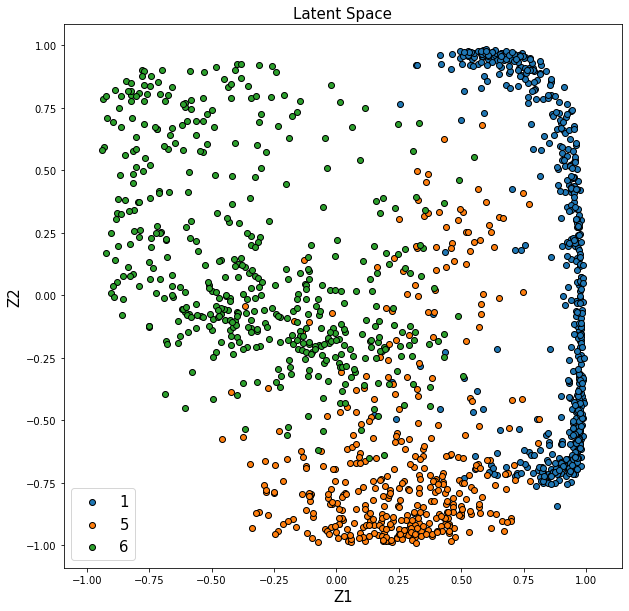

In [51]:
test_latent = encoder(X_test)

plt.figure(figsize = (10,10))
plt.scatter(test_latent[np.argmax(y_test, axis = 1) == 1,0], test_latent[np.argmax(y_test, axis = 1) == 1,1], label = '1',edgecolors='black',lw=1)
plt.scatter(test_latent[np.argmax(y_test, axis = 1) == 5,0], test_latent[np.argmax(y_test, axis = 1) == 5,1], label = '5',edgecolors='black',lw=1)
plt.scatter(test_latent[np.argmax(y_test, axis = 1) == 6,0], test_latent[np.argmax(y_test, axis = 1) == 6,1], label = '6',edgecolors='black',lw=1)
plt.title('Latent Space', fontsize=15)
plt.xlabel('Z1', fontsize=15)
plt.ylabel('Z2', fontsize=15)
plt.legend(fontsize = 15)
plt.axis('equal')
plt.show()

In [52]:
def decoder(new_data):
    new_data = np.asmatrix(new_data)
    decoder2 = new_data*reg.coefs_[3] + reg.intercepts_[3]
    decoder2 = (np.exp(decoder2) - np.exp(-decoder2))/(np.exp(decoder2) + np.exp(-decoder2))

    decoder1 = decoder2*reg.coefs_[4] + reg.intercepts_[4]
    decoder1 = (np.exp(decoder1) - np.exp(-decoder1))/(np.exp(decoder1) + np.exp(-decoder1))

    reconst = decoder1*reg.coefs_[5] + reg.intercepts_[5]
    reconst = (np.exp(reconst) - np.exp(-reconst))/(np.exp(reconst) + np.exp(-reconst))

    return np.asarray(reconst)

### Choosing a random point from the latent space
In the code below, we choose a random point `latent` in the latent space, and use the decoder to generate an image. In the plots below, the red point on the left is our random point, and the image on the left is the image generated by this point.

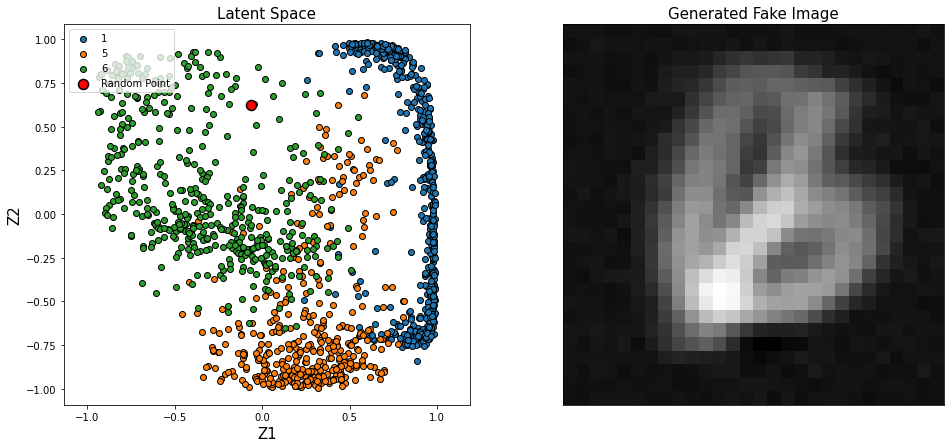

In [55]:
latent = np.array([[np.random.choice([-1,1],p=[0.5,0.5])*np.random.rand(),
                    np.random.choice([-1,1],p=[0.5,0.5])*np.random.rand()]])
reconst = decoder(latent)

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.scatter(test_latent[np.argmax(y_test, axis = 1) == 1,0], test_latent[np.argmax(y_test, axis = 1) == 1,1], label = '1',edgecolors='black',lw=1)
plt.scatter(test_latent[np.argmax(y_test, axis = 1) == 5,0], test_latent[np.argmax(y_test, axis = 1) == 5,1], label = '5',edgecolors='black',lw=1)
plt.scatter(test_latent[np.argmax(y_test, axis = 1) == 6,0], test_latent[np.argmax(y_test, axis = 1) == 6,1], label = '6',edgecolors='black',lw=1)
plt.scatter(latent[:,0], latent[:,1], c = 'r', marker = 'o', s = 100, label = 'Random Point',edgecolors='black',lw=1.5)
plt.title('Latent Space', fontsize = 15)
plt.xlabel('Z1', fontsize = 15)
plt.ylabel('Z2', fontsize = 15)
plt.legend(loc = 2, fontsize = 10)
plt.axis('equal')
plt.subplot(1,2,2)
plt.imshow(reconst.reshape(28,28), 'gray')
plt.title('Generated Fake Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.show()

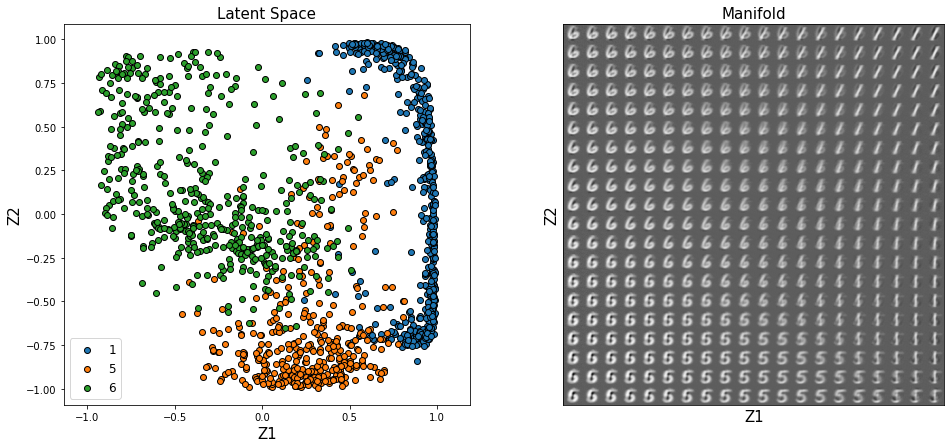

In [56]:
# Initialize canvas
nx = 20
ny = 20
x_values = np.linspace(-1, 1, nx)
y_values = np.linspace(-1, 1, ny)
canvas = np.empty((28*ny, 28*nx))

for i, yi in enumerate(y_values):
        for j, xi in enumerate(x_values):
            latent = np.array([[xi, yi]])
            reconst = decoder(latent)
            canvas[(nx-i-1)*28:(nx-i)*28,j*28:(j+1)*28] = reconst.reshape(28, 28)

plt.figure(figsize = (16, 7))
plt.subplot(1,2,1)
plt.scatter(test_latent[np.argmax(y_test, axis = 1) == 1,0], test_latent[np.argmax(y_test, axis = 1) == 1,1], label = '1',edgecolors='black',lw=1)
plt.scatter(test_latent[np.argmax(y_test, axis = 1) == 5,0], test_latent[np.argmax(y_test, axis = 1) == 5,1], label = '5',edgecolors='black',lw=1)
plt.scatter(test_latent[np.argmax(y_test, axis = 1) == 6,0], test_latent[np.argmax(y_test, axis = 1) == 6,1], label = '6',edgecolors='black',lw=1)
plt.title('Latent Space', fontsize = 15)
plt.xlabel('Z1', fontsize = 15)
plt.ylabel('Z2', fontsize = 15)
plt.legend(fontsize = 12)
plt.axis('equal')
plt.subplot(1,2,2)
plt.imshow(canvas, 'gray')
plt.title('Manifold', fontsize = 15)
plt.xlabel('Z1', fontsize = 15)
plt.ylabel('Z2', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.show()

## Why doesn't the autoencoder generate samples very well?
For a generative model to be successful, we want to be able to pick a random point in the latent space and generate an image which looks like it is part of our original dataset. The reason that normal autoencoders are so prone to overfitting is because they are trained to encode and decode with as few examples as possible, regardless of how the latent space is organized. Hence, we want our latent space to be *continuous* rather than discrete, (i.e., a probability distribution) so that each random point in the latent space will generate samples properly. This is where **Variational Autoencoders** come in.<br>
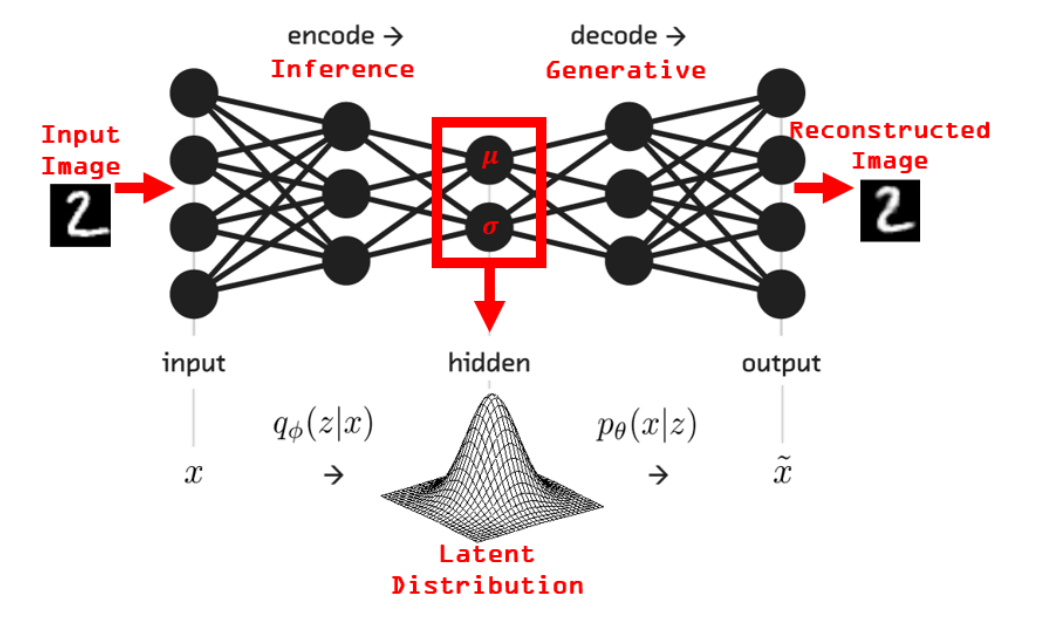

---
# 2. Variational Autoencoders


- **Definition** : A *Variational Autoencoder* can be defined as being an autoencoder whose training is **regularised** to avoid overfitting and ensure that the latent space has good properties that enable generative process.<br>

In order to accomplish this regularization, the encoding-decoding scheme is slightly modified. Rather than encoding each individual input as a single point in the latent space, we encode it as a probability distribution over the latent space, and then a sample from that distribution is decoded and training continues in the usual way. In practice the distribution is chosen to be Gaussian.<br>

There are two properties that we require for the latent space in order to make the generative process possible:
1. Continuity
2. Completeness

## Tensorflow Implementation

### Import Dependencies

In [1]:
from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_probability as tfp
import time

11493376/11490434 [==============================] - 0s 0us/step


### Load MNIST Digits
We will model each pixel with a Bernoulli distribution in this model

In [10]:
(train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()

In [11]:

def preprocess_images(images):
  images = images.reshape((images.shape[0], 28, 28, 1)) / 255.
  return np.where(images > .5, 1.0, 0.0).astype('float32')

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

In [12]:
train_size = 60000
batch_size = 32
test_size = 10000

### Batch and Shuffle the data using `tf.data`

In [13]:
train_dataset = (tf.data.Dataset.from_tensor_slices(train_images)
                 .shuffle(train_size).batch(batch_size))
test_dataset = (tf.data.Dataset.from_tensor_slices(test_images)
                .shuffle(test_size).batch(batch_size))

### Define Convolutional Autoencoder class

In [14]:
class CVAE(tf.keras.Model):
  """Convolutional variational autoencoder."""
  def __init__(self, latent_dim):
    super(CVAE, self).__init__()
    self.latent_dim = latent_dim

    #  ENCODER 
    self.encoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(latent_dim + latent_dim),
        ]
    )


    #   DECODER
    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
            tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu),
            tf.keras.layers.Reshape(target_shape=(7, 7, 32)),
            tf.keras.layers.Conv2DTranspose(
                filters=64, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            tf.keras.layers.Conv2DTranspose(
                filters=32, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            # No activation
            tf.keras.layers.Conv2DTranspose(
                filters=1, kernel_size=3, strides=1, padding='same'),
        ]
    )

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits

### Define Loss Functions

In [16]:
optimizer = tf.keras.optimizers.Adam(1e-4)


def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)


def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
  logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x)


@tf.function
def train_step(model, x, optimizer):
  """Executes one training step and returns the loss.

  This function computes the loss and gradients, and uses the latter to
  update the model's parameters.
  """
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

### Training

In [29]:
epochs = 25
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 2
num_examples_to_generate = 16

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim)

epochs = 10
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 2
num_examples_to_generate = 16

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim)

def generate_and_save_images(model, epoch, test_sample):
  mean, logvar = model.encode(test_sample)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(predictions[i, :, :, 0], cmap='gray')
    plt.axis('off')

  # tight_layout minimizes the overlap between 2 sub-plots
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [30]:
# Pick a sample of the test set for generating output images
assert batch_size >= num_examples_to_generate
for test_batch in test_dataset.take(1):
  test_sample = test_batch[0:num_examples_to_generate, :, :, :]

### Visualizations

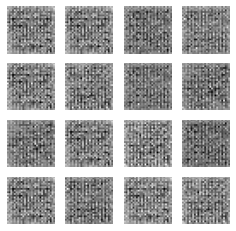

ValueError: ignored

In [36]:
generate_and_save_images(model, 0, test_sample)

for epoch in range(1, epochs + 1):
  start_time = time.time()
  for train_x in train_dataset:
    train_step(model, train_x, optimizer)
  end_time = time.time()

  loss = tf.keras.metrics.Mean()
  for test_x in test_dataset:
    loss(compute_loss(model, test_x))
  elbo = -loss.result()
  display.clear_output(wait=False)
  print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
        .format(epoch, elbo, end_time - start_time))
  generate_and_save_images(model, epoch, test_sample)

In [ ]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

plt.imshow(display_image(epoch))
plt.axis('off')  # Display images

In [ ]:
anim_file = 'cvae.gif'
with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)